<a href="https://colab.research.google.com/github/blparish/TestRepo/blob/master/notebooks/run_Cellpose-SAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cellpose-SAM: superhuman generalization for cellular segmentation

Marius Pachitariu, Michael Rariden, Carsen Stringer

[paper](https://www.biorxiv.org/content/10.1101/2025.04.28.651001v1) | [code](https://github.com/MouseLand/cellpose)

This notebook shows how to process your own 2D or 3D images, saved on Google Drive.

This notebook is adapted from the notebook by Pradeep Rajasekhar, inspired by the [ZeroCostDL4Mic notebook series](https://github.com/HenriquesLab/ZeroCostDL4Mic/wiki).

### Make sure you have GPU access enabled by going to Runtime -> Change Runtime Type -> Hardware accelerator and selecting GPU

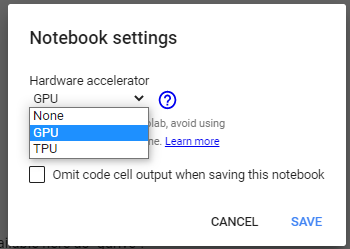

### Mount your google drive

Run this cell to connect your Google Drive to colab:
* Click on the URL.
* Sign in your Google Account.

You will either have to:
* copy the authorisation code and enter it into box below OR
* in the new google colab, you can just click "Allow" and it should connect.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



Then click on "Folder" icon on the Left, press the refresh button. Your Google Drive folder should now be available here as "gdrive".


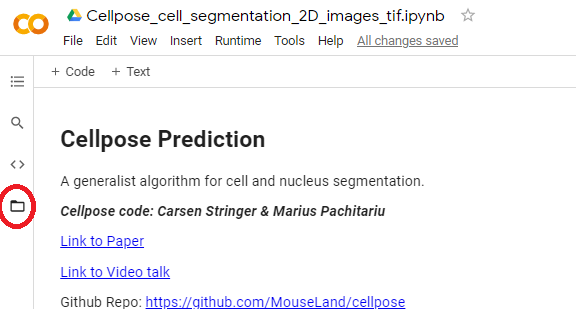

Click on the triangle icon and it will allow you to access whole drive. Navigate to the folder containing your images. Once you are there, click on the three dots on the right of the folder and select "Copy Path"

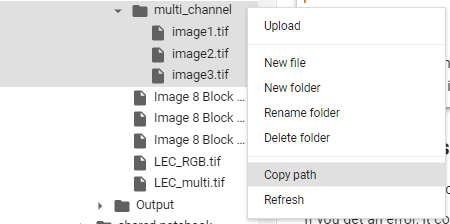

Copy and paste this path in the **dir** string below

### Install Cellpose-SAM


In [2]:
!pip install git+https://www.github.com/mouseland/cellpose.git

  Cloning https://www.github.com/mouseland/cellpose.git to /tmp/pip-req-build-ifi43kjc
  Running command git clone --filter=blob:none --quiet https://www.github.com/mouseland/cellpose.git /tmp/pip-req-build-ifi43kjc
  Resolved https://www.github.com/mouseland/cellpose.git to commit 785d3390e237b8f1519dcfdb2eb8049f6fa8c751
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 124.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
  

Check GPU and instantiate model - will download weights.

In [3]:
import numpy as np
from cellpose import models, core, io, plot
from pathlib import Path
from tqdm import trange
import matplotlib.pyplot as plt
from natsort import natsorted

io.logger_setup() # run this to get printing of progress

#Check if colab notebook instance has GPU access
if core.use_gpu()==False:
  raise ImportError("No GPU access, change your runtime")

model = models.CellposeModel(gpu=True)



Welcome to CellposeSAM, cellpose v
cellpose version: 	4.0.3.dev15+g785d339 
platform:       	linux 
python version: 	3.11.12 
torch version:  	2.6.0+cu124! The neural network component of
CPSAM is much larger than in previous versions and CPU excution is slow. 
We encourage users to use GPU/MPS if available. 


creating new log file
2025-05-10 18:10:18,520 [INFO] WRITING LOG OUTPUT TO /root/.cellpose/run.log
2025-05-10 18:10:18,521 [INFO] 
cellpose version: 	4.0.3.dev15+g785d339 
platform:       	linux 
python version: 	3.11.12 
torch version:  	2.6.0+cu124
2025-05-10 18:10:18,821 [INFO] ** TORCH CUDA version installed and working. **
2025-05-10 18:10:18,822 [INFO] ** TORCH CUDA version installed and working. **
2025-05-10 18:10:18,823 [INFO] >>>> using GPU (CUDA)
2025-05-10 18:10:22,147 [INFO] Downloading: "https://huggingface.co/mouseland/cellpose-sam/resolve/main/cpsam" to /root/.cellpose/models/cpsam



100%|██████████| 1.15G/1.15G [00:08<00:00, 144MB/s]


Input directory with your images:

In [4]:
# *** change to your google drive folder path ***
dir = "/content/drive/MyDrive/GWU/Praxis/Images/train"
dir = Path(dir)
if not dir.exists():
  raise FileNotFoundError("directory does not exist")

# *** change to your image extension ***
image_ext = ".png"

# list all files
files = natsorted([f for f in dir.glob("*"+image_ext) if "_masks" not in f.name and "_flows" not in f.name])

if(len(files)==0):
  raise FileNotFoundError("no image files found, did you specify the correct folder and extension?")
else:
  print(f"{len(files)} images in folder:")

for f in files:
  print(f.name)

540 images in folder:
000_img.png
001_img.png
002_img.png
003_img.png
004_img.png
005_img.png
006_img.png
007_img.png
008_img.png
009_img.png
010_img.png
011_img.png
012_img.png
013_img.png
014_img.png
015_img.png
016_img.png
017_img.png
018_img.png
019_img.png
020_img.png
021_img.png
022_img.png
023_img.png
024_img.png
025_img.png
026_img.png
027_img.png
028_img.png
029_img.png
030_img.png
031_img.png
032_img.png
033_img.png
034_img.png
035_img.png
036_img.png
037_img.png
038_img.png
039_img.png
040_img.png
041_img.png
042_img.png
043_img.png
044_img.png
045_img.png
046_img.png
047_img.png
048_img.png
049_img.png
050_img.png
051_img.png
052_img.png
053_img.png
054_img.png
055_img.png
056_img.png
057_img.png
058_img.png
059_img.png
060_img.png
061_img.png
062_img.png
063_img.png
064_img.png
065_img.png
066_img.png
067_img.png
068_img.png
069_img.png
070_img.png
071_img.png
072_img.png
073_img.png
074_img.png
075_img.png
076_img.png
077_img.png
078_img.png
079_img.png
080_img.png
081_im

## Run Cellpose-SAM on one image in folder

Here are some of the parameters you can change:

* ***flow_threshold*** is  the  maximum  allowed  error  of  the  flows  for  each  mask.   The  default  is 0.4.
    *  **Increase** this threshold if cellpose is not returning as many masks as you’d expect (or turn off completely with 0.0)
    *   **Decrease** this threshold if cellpose is returning too many ill-shaped masks.

* ***cellprob_threshold*** determines proability that a detected object is a cell.   The  default  is 0.0.
    *   **Decrease** this threshold if cellpose is not returning as many masks as you’d expect or if masks are too small
    *   **Increase** this threshold if cellpose is returning too many masks esp from dull/dim areas.

* ***tile_norm_blocksize*** determines the size of blocks used for normalizing the image. The default is 0, which means the entire image is normalized together.
  You may want to change this to 100-200 pixels if you have very inhomogeneous brightness across your image.



2025-05-10 18:16:10,319 [INFO] WRITING LOG OUTPUT TO /root/.cellpose/run.log
2025-05-10 18:16:10,320 [INFO] 
cellpose version: 	4.0.3.dev15+g785d339 
platform:       	linux 
python version: 	3.11.12 
torch version:  	2.6.0+cu124
2025-05-10 18:16:10,322 [INFO] ** TORCH CUDA version installed and working. **
2025-05-10 18:16:10,323 [INFO] ** TORCH CUDA version installed and working. **
2025-05-10 18:16:10,324 [INFO] >>>> using GPU (CUDA)
2025-05-10 18:16:13,214 [INFO] >>>> loading model /root/.cellpose/models/cpsam


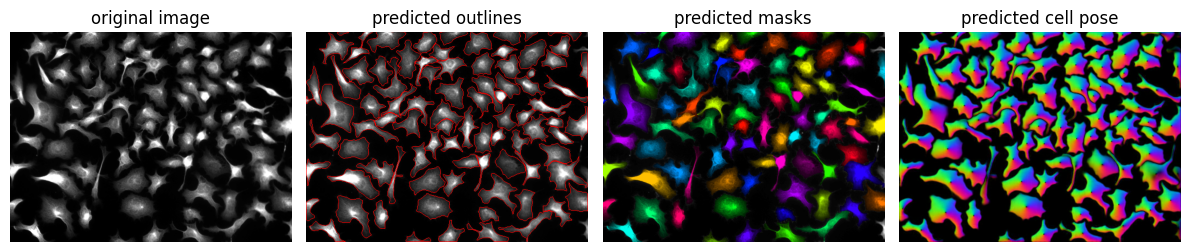

In [8]:
import numpy as np
from cellpose import models, core, io, plot
from pathlib import Path
from tqdm import trange
import matplotlib.pyplot as plt
from natsort import natsorted
import skimage.color # import color conversion

io.logger_setup() # run this to get printing of progress

#Check if colab notebook instance has GPU access
if core.use_gpu()==False:
  raise ImportError("No GPU access, change your runtime")

model = models.CellposeModel(gpu=True)

# In[7]
img = io.imread(files[0])
# Convert to grayscale using skimage
img = skimage.color.rgb2gray(img) # convert to grayscale with skimage

flow_threshold = 0.4
cellprob_threshold = 0.0
tile_norm_blocksize = 0

masks, flows, styles = model.eval(img, batch_size=32, flow_threshold=flow_threshold, cellprob_threshold=cellprob_threshold,
                                  normalize={"tile_norm_blocksize": tile_norm_blocksize})

fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, img, masks, flows[0])
plt.tight_layout()
plt.show()



## Run Cellpose-SAM on folder of images

if you have many large images, you may want to run them as a loop over images



In [9]:
masks_ext = "_masks.png" if image_ext == ".png" else ".tif"
for i in trange(len(files)):
    f = files[i]
    img = io.imread(f)
    masks, flows, styles = model.eval(img, batch_size=32, flow_threshold=flow_threshold, cellprob_threshold=cellprob_threshold,
                                  normalize={"tile_norm_blocksize": tile_norm_blocksize})
    io.imsave(dir / (f.stem + "_masks" + masks_ext), masks)

  1%|          | 5/540 [00:11<21:04,  2.36s/it]


KeyboardInterrupt: 

if you have small images, you may want to load all of them first and then run, so that they can be batched together on the GPU

In [ ]:
print("loading images")
imgs = [io.imread(files[i]) for i in trange(len(files))]

print("running cellpose-SAM")
masks, flows, styles = model.eval(imgs, batch_size=32, flow_threshold=flow_threshold, cellprob_threshold=cellprob_threshold,
                                  normalize={"tile_norm_blocksize": tile_norm_blocksize})

print("saving masks")
for i in trange(len(files)):
    f = files[i]
    io.imsave(dir / (f.stem + "_SAMmasks.png" ), masks[i])

loading images


 10%|█         | 56/540 [00:20<03:04,  2.62it/s]

to save your masks for ImageJ, run the following code:

In [ ]:
for i in trange(len(files)):
    f = files[i]
    masks0 = io.imsave(dir / (f.name + "_SAM_masks" + masks_ext))
    io.save_rois(masks0, f)

In [1]:
import matplotlib.pyplot as plt
plt.imshow(masks[0])  # Display the first mask
plt.show()

NameError: name 'masks' is not defined